In [18]:
import os
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
sz = 28
name = 'rm'

In [3]:
x_train = []
x_val = []
y_train = []
y_val = []

In [4]:
# read dataset
dataset_path = f'training_val_{name}/train'
# training dataset
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if os.path.isfile(image_path) and image_name.lower().endswith((".png", ".jpg", ".jpeg")):
                image = Image.open(image_path)
                x_train.append(image)
                y_train.append(int(folder_name))
# val dataset               
dataset_path = f'training_val_{name}/val'
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if os.path.isfile(image_path) and image_name.lower().endswith((".png", ".jpg", ".jpeg")):
                image = Image.open(image_path)
                x_val.append(image)
                y_val.append(int(folder_name))

In [5]:
# convert the images to numpy array and convert it to one-dimensional
x_train = np.array([np.array(image) for image in x_train])
x_train = x_train.reshape(x_train.shape[0], -1)

x_val = np.array([np.array(image) for image in x_val])
x_val = x_val.reshape(x_val.shape[0], -1)

In [6]:
# shuffle training dataset
zipp = list(zip(x_train, y_train))
np.random.seed(100)
np.random.shuffle(zipp)

x_train, y_train = zip(*zipp)

x_train = np.array(x_train)
y_train = np.array(y_train)

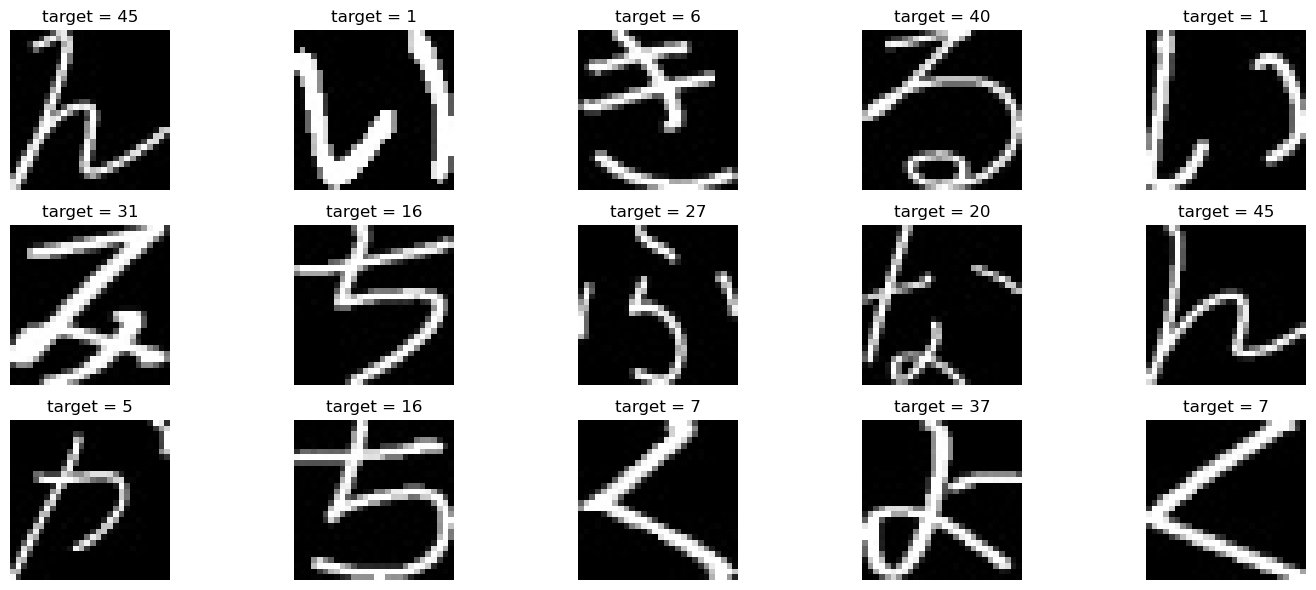

In [7]:
# print out the first 15 images to verify if the shuffling was successful
img_size = sz

fig, axs = plt.subplots(3, 5, figsize=(15, 6))
axs = axs.flatten()
add = 100
for i in range(15):
    axs[i].imshow(x_train[i + add].reshape(img_size, img_size), cmap='gray')
    axs[i].set_title(f"target = {y_train[i + add]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [8]:
# train the random forest model
rf_model = RandomForestClassifier(n_estimators = 950, max_features = 10, random_state=0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=950, random_state=0)

In [9]:
# calculate accuracy
accuracy = rf_model.score(x_val, y_val)
print(f"accuracy: {accuracy}")

accuracy: 0.8367768595041323


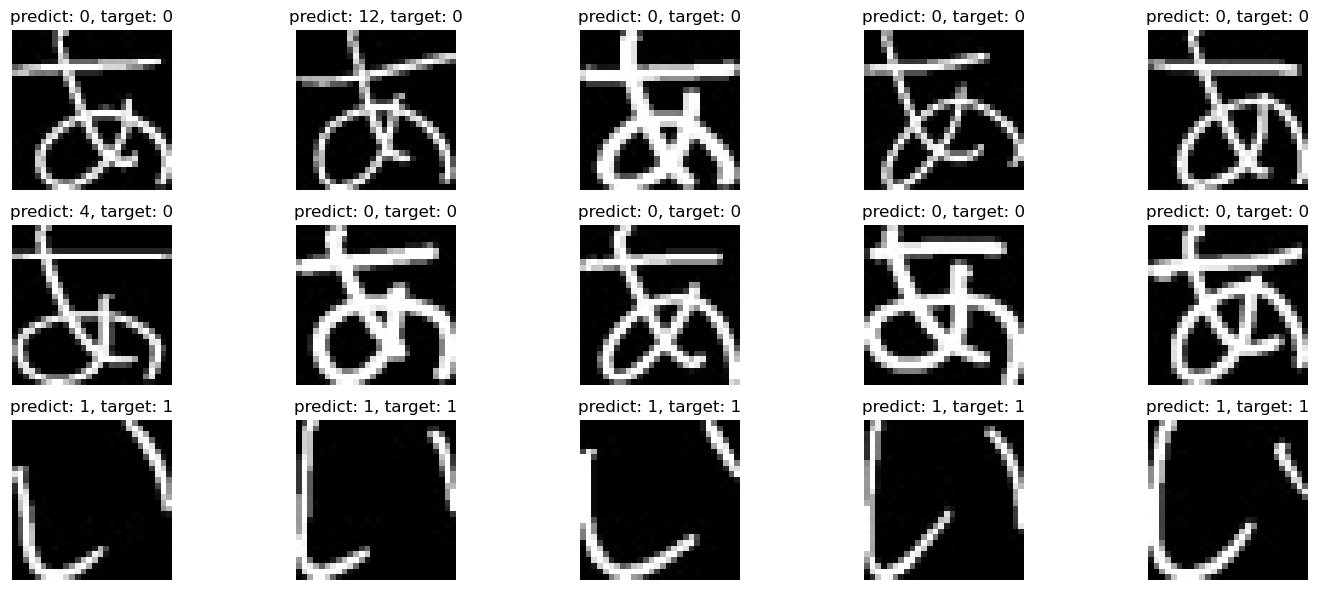

In [10]:
# print out the first 15 images, predicts and targets
y_pred = rf_model.predict(x_val)

fig, axs = plt.subplots(3, 5, figsize=(15, 6))
axs = axs.flatten()
add = 0
for i in range(15):
    axs[i].imshow(x_val[i + add].reshape(img_size, img_size), cmap='gray')
    axs[i].set_title(f"predict: {y_pred[i + add]}, target: {y_val[i + add]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
print(metrics.classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.90      1.00      0.95         9
           2       0.91      0.71      0.80        14
           3       1.00      0.65      0.79        17
           4       1.00      0.81      0.90        16
           5       0.89      0.73      0.80        11
           6       0.80      0.67      0.73        12
           7       1.00      1.00      1.00        10
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         9
          10       0.55      0.86      0.67         7
          11       1.00      0.92      0.96        13
          12       1.00      0.88      0.93        16
          13       1.00      0.87      0.93        15
          14       1.00      0.75      0.86        12
          15       0.25      1.00      0.40         3
          16       1.00      0.90      0.95        10
          17       1.00    

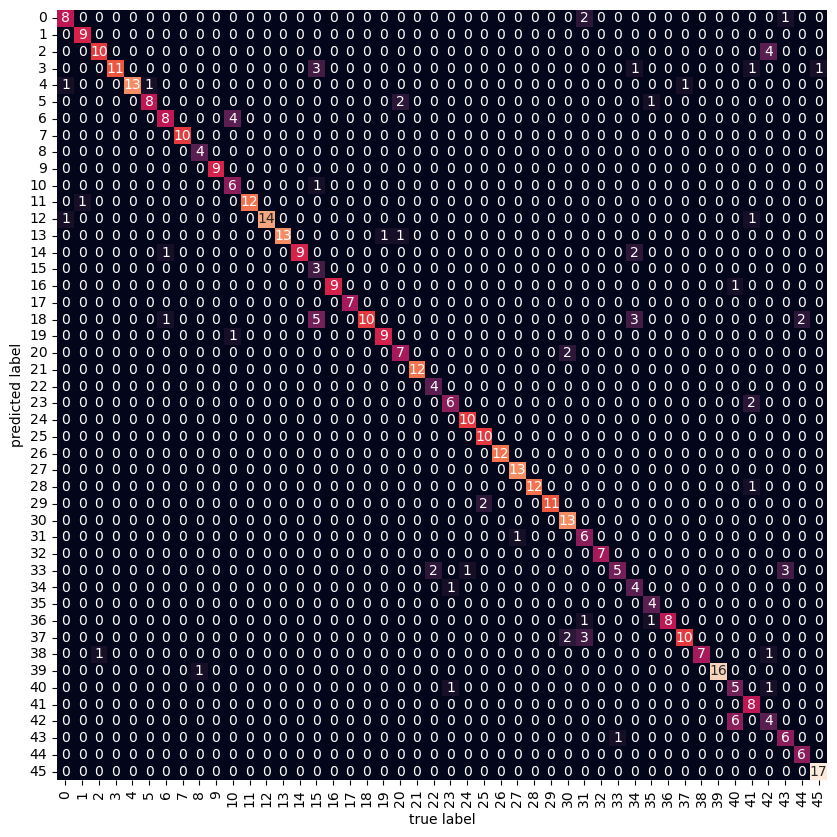

In [22]:
mat = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');